# Berlin Temperatures 2009-2019

## Table of Contents

1. Introduction
2. Install & Import Packages
3. Access Data from NOAA
4. Plot Station Using mplleaflet
5. Transform Data
6. Plot Data
7. Future Areas to Explore

## 1. Introduction

Extreme temperature is an increasingly important topic to understand. As Berlin is my home, it would be great to visualize how its temperatures fared in 2019. Let's create an engaging, multidimensional visual of 2019 record highs and lows compared to the maximum and minimum temperatures for dates the decade before (from 2009 through 2018). This could be useful for fellow Berliners, public policy planners, or specialists looking to communicate similar patterns and trends in other areas. 

We'll access data from the NOAA's NCDC website (https://www.ncdc.noaa.gov/cdo-web/) using the search tool for daily summaries from January 1, 2009 through December 31, 2019 for stations in Berlin, Germany. We'll select the Schonefeld Airport station (GME00127930) as it has 100% coverage for these dates. Let's select air tempature information and the output format as 'Custom GHCN-Daily CSV'. Voila, a few minutes later, it's in our email inbox. NOAA has data from well over 100,000 weather stations around the world if you'd like to understand how your hometown is faring. 

First, we'll create a quick mplleaflet geo plot of the station using its latitude and longitude. 

Next, in transforming the data, let's slice what we need, use datetime methods like to_datetime and strftime on the dates, remove all February 29s (leap year day), group by month_day using groupby, and determine the max and min highs and lows for each date using numpy functions .min() and .max(). We'll then perform a 'left' merge to get our final dataframe. Let's also create record high and low series for 2019 that include temperatures above and below the max and min, respectively, for each date the decade before (2009-2018). A quick check on the record high and low dataframes reveals that in 2019, Berlin had 45 days with record high temperatures and 21 days with record low temperatures. 

Lastly, for plotting, let's be sure to create a visual that's truthful (includes relevant data, labels, scaling), functional, beautiful (clean and engaging), and insightful for fellow Berliners. 

As the main purpose here is to create an engaging end-visual, there's still a ton more we could explore, including interactive visuals and web apps, distributions and spreads, additional groupings by dates, incorporating other Berlin weather station data and precipitation data, broadening the timeframe, and forecasting. 

## 2. Install & Import Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
!pip install mplleaflet # For mapping the station
import mplleaflet
import matplotlib.dates as dates
import matplotlib.ticker as ticker
from datetime import datetime

  Stored in directory: /home/dsxuser/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet


## 3. Access Data from NOAA 

We'll access data from the NOAA's NCDC website (https://www.ncdc.noaa.gov/cdo-web/) using the search tool for daily summaries from January 1, 2009 through December 31, 2019 for stations in Berlin, Germany. We'll select the Schonefeld Airport station (GME00127930) as it has 100% coverage for these dates. Let's select air tempature information and the output format as 'Custom GHCN-Daily CSV'. Voila, a few minutes later, it's in our email inbox. NOAA has data from well over 100,000 weather stations around the world if you'd like to understand how your hometown is faring. 

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
# Read in data. TMAX and TMIN refer to the high and low temperature, respectively, in degrees Celsius
df_raw = pd.read_csv(body)
df_raw.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TMAX,TMIN
0,GME00127930,"BERLIN SCHONEFELD, GM",52.3819,13.5325,46.0,2009-01-01,-1.2,-8.1
1,GME00127930,"BERLIN SCHONEFELD, GM",52.3819,13.5325,46.0,2009-01-02,-0.3,-10.5
2,GME00127930,"BERLIN SCHONEFELD, GM",52.3819,13.5325,46.0,2009-01-03,0.0,-11.4
3,GME00127930,"BERLIN SCHONEFELD, GM",52.3819,13.5325,46.0,2009-01-04,0.9,-0.2
4,GME00127930,"BERLIN SCHONEFELD, GM",52.3819,13.5325,46.0,2009-01-05,0.1,-13.1


In [16]:
# Check shape - we have 4017 observations and 8 features
df_raw.shape

(4017, 8)

In [17]:
# Check for null values - as expected, there are none as this station has 100% coverage
df_raw.isnull().sum()

STATION      0
NAME         0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
DATE         0
TMAX         0
TMIN         0
dtype: int64

In [19]:
# Check info and data types. Notice that DATE is the object data type - we'll need to convert this to datetime data type later
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 8 columns):
STATION      4017 non-null object
NAME         4017 non-null object
LATITUDE     4017 non-null float64
LONGITUDE    4017 non-null float64
ELEVATION    4017 non-null float64
DATE         4017 non-null object
TMAX         4017 non-null float64
TMIN         4017 non-null float64
dtypes: float64(5), object(3)
memory usage: 251.1+ KB


## 4. Plot Station Using mplleaflet

In [4]:
# Latitude and longitude from above
lat = df_raw.loc[0, 'LATITUDE']
long = df_raw.loc[0, 'LONGITUDE']

# Plot
plt.figure(figsize=(10,10))
plt.scatter(long, lat, c='r', alpha=0.7, s=300)
mplleaflet.display()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## 5. Transform Data

In [5]:
# Keep only DATE, TMAX, and TMIN columns
data = df_raw.iloc[:,5:8]
data.head()

,DATE,TMAX,TMIN
0,2009-01-01,-1.2,-8.1
1,2009-01-02,-0.3,-10.5
2,2009-01-03,0.0,-11.4
3,2009-01-04,0.9,-0.2
4,2009-01-05,0.1,-13.1


In [6]:
# Convert date data to datetime type
data['DATE'] = pd.to_datetime(data['DATE'])

# Create Year column
data['Year'] = data['DATE'].dt.year

# Create Month_Day column (strftime converts date time to string)
data['Month_Day'] = data['DATE'].dt.strftime('%m-%d')

# Remove February 29 (leap year day):
data = data[data['Month_Day']!='02-29']

# Check first few rows
data.head()

,DATE,TMAX,TMIN,Year,Month_Day
0,2009-01-01,-1.2,-8.1,2009,01-01
1,2009-01-02,-0.3,-10.5,2009,01-02
2,2009-01-03,0.0,-11.4,2009,01-03
3,2009-01-04,0.9,-0.2,2009,01-04
4,2009-01-05,0.1,-13.1,2009,01-05


In [7]:
# Max and min data for TMAX and TMIN only for 2009 through 2018, grouping by each day
max_temp = data[(data.Year >= 2009) & (data.Year < 2019)].groupby(['Month_Day'])['TMAX'].max()
min_temp = data[(data.Year >= 2009) & (data.Year < 2019)].groupby(['Month_Day'])['TMIN'].min()

In [8]:
# Check max_temp series
max_temp.head()

Month_Day
01-01    11.1
01-02    12.5
01-03    10.1
01-04     9.6
01-05     9.7
Name: TMAX, dtype: float64

In [9]:
# Check min_temp series
min_temp.head()

Month_Day
01-01    -8.1
01-02   -10.5
01-03   -11.7
01-04   -11.8
01-05   -13.1
Name: TMIN, dtype: float64

In [10]:
# Merge max_temp and min_temp  data with 'data' dataframe on 'Month_Day' column 
# Use left merge as we want to keep all rows on left ('data') (missing 'Month_Day' values in right are NaN)
data = data.merge(max_temp.reset_index(drop=False).rename(columns={'TMAX':'Max_temp'}), on='Month_Day', how='left')
data = data.merge(min_temp.reset_index(drop=False).rename(columns={'TMIN':'Min_temp'}), on='Month_Day', how='left')

# Record highs and lows for 2019 (2019 temps above and below the max and min for 2009 through 2018)
record_high = data[(data.Year==2019)&(data.TMAX > data.Max_temp)]
record_low = data[(data.Year==2019)&(data.TMIN < data.Min_temp)]

In [11]:
# Check first few rows of new merged data
data.head()

,DATE,TMAX,TMIN,Year,Month_Day,Max_temp,Min_temp
0,2009-01-01,-1.2,-8.1,2009,01-01,11.1,-8.1
1,2009-01-02,-0.3,-10.5,2009,01-02,12.5,-10.5
2,2009-01-03,0.0,-11.4,2009,01-03,10.1,-11.7
3,2009-01-04,0.9,-0.2,2009,01-04,9.6,-11.8
4,2009-01-05,0.1,-13.1,2009,01-05,9.7,-13.1


In [12]:
record_high_num = len(record_high)
print("In 2019, Berlin had {} days with record high temperatures relative to the previous decade".format(record_high_num))

In 2019, Berlin had 45 days with record high temperatures relative to the previous decade


In [13]:
record_low_num = len(record_low)
print("In 2019, Berlin had {} days with record low temperatures relative to the previous decade".format(record_low_num))

In 2019, Berlin had 21 days with record low temperatures relative to the previous decade


## 6. Plot Data

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


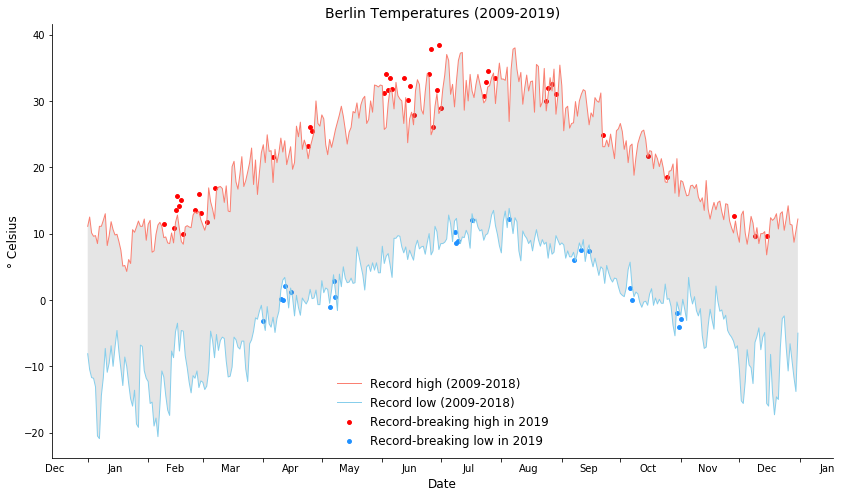

In [14]:
# x-axis spanning 2019 only
# Remember .arange is end exclusive, also specify datetime type otherwise .arange will read values as strings
date_index = np.arange('2019-01-01','2020-01-01', dtype='datetime64[D]')

# Figure size
plt.figure(figsize=(14,8))

# Line plot of max and min temps by date
plt.plot(date_index, max_temp, color='salmon', linewidth=1) 
plt.plot(date_index, min_temp,color='skyblue', linewidth=1) 

# Scatter plot of 2019 record highs and lows
plt.scatter(record_high.DATE.values, record_high.TMAX.values, color='red', s=15)
plt.scatter(record_low.DATE.values, record_low.TMIN.values, color='dodgerblue', s=15)

# Fill colour between highs and lows
ax = plt.gca() # gets current axes
ax.fill_between(date_index, max_temp, min_temp, facecolor='grey', alpha=0.20)

# Set axis names and title:
plt.xlabel('Date', fontsize=12)
plt.ylabel('° Celsius', fontsize=12)
plt.title('Berlin Temperatures (2009-2019)', fontsize=14)

# Create legend and title, loc=0 provides the best position for the legend
plt.legend(['Record high (2009-2018)','Record low (2009-2018)','Record-breaking high in 2019','Record-breaking low in 2019'], loc='lower center', fontsize=12, frameon=False)

# Where you locate the major and minor ticks
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15)) # Put the label at the minor tick so it's in the center.

# What you put at the ticks
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b')) #%b means abbreviated month name, e.g., Jan

# 1 refers to the bottom of the plot for xticks and the left for yticks
# 2 refers to the top of the plot for xticks and the right for yticks
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0) # Make small ticker disappear
    tick.label1.set_horizontalalignment('center')

# Remove top and right spines to clean it up
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

## 7. Future Areas to Explore

As the main purpose here is to create an engaging end-visual, there's still a ton more we could explore, including interactive visuals and web apps, distributions and spreads, additional groupings by dates, incorporating other Berlin weather station data and precipitation data, broadening the timeframe, and forecasting. 